In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
digit = load_digits()

In [3]:
X = digit.data
y = digit.target

Digit : 6


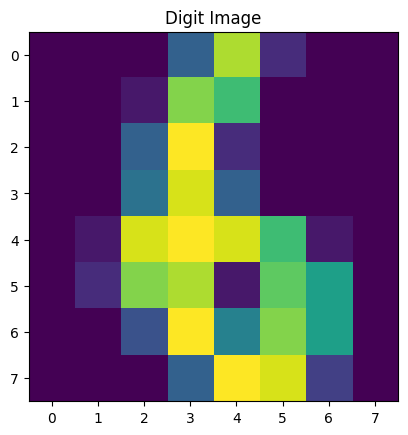

In [4]:
%matplotlib inline
plt.title("Digit Image")
plt.imshow(X[34].reshape(8,8))
print("Digit :",y[34])
plt.show()

In [5]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=64)

In [6]:
base_est = DecisionTreeClassifier()

In [7]:
model = AdaBoostClassifier(estimator=base_est, n_estimators=100)

In [8]:
model.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [9]:
model.score(X_tr, y_tr)

1.0

In [10]:
y_pr = model.predict(X_te)

In [11]:
accuracy_score(y_te, y_pr)

0.8644444444444445

In [12]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.83      0.95      0.88        40
           2       0.89      0.93      0.91        44
           3       0.78      0.86      0.82        49
           4       0.98      0.91      0.94        45
           5       0.89      0.81      0.85        42
           6       0.90      0.98      0.94        46
           7       0.83      0.82      0.83        55
           8       0.84      0.74      0.79        43
           9       0.79      0.75      0.77        44

    accuracy                           0.86       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.86      0.86       450



In [13]:
cnf = confusion_matrix(y_te, y_pr)

<Axes: >

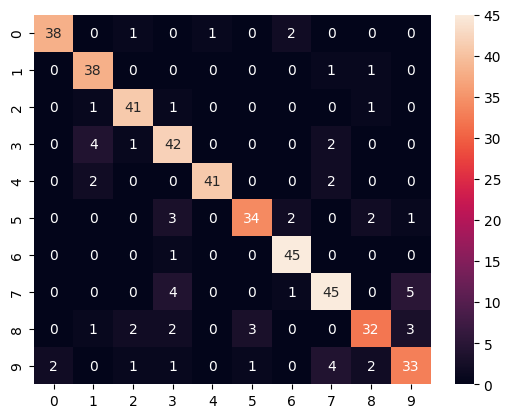

In [14]:
sns.heatmap(cnf, annot=True, fmt="d")

In [15]:
from sklearn.ensemble import StackingClassifier

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
base_estimators = [("svc", SVC(kernel="linear")),
                   ("dt", DecisionTreeClassifier(criterion="entropy", max_depth=5)),
                    ("logreg", LogisticRegression())]

In [18]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [19]:
sc = StackingClassifier(estimators=base_estimators, final_estimator=model, cv=5,
                       n_jobs=-1, verbose=1)

In [20]:
sc.fit(X_tr, y_tr)

StackingClassifier(cv=5,
                   estimators=[('svc', SVC(kernel='linear')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5)),
                               ('logreg', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=5),
                   n_jobs=-1, verbose=1)

In [21]:
sc.predict(X_te)

array([5, 9, 5, 2, 4, 6, 4, 3, 2, 0, 4, 7, 1, 1, 7, 5, 4, 5, 9, 5, 5, 5,
       7, 9, 9, 3, 1, 6, 9, 6, 2, 2, 7, 5, 5, 6, 1, 7, 0, 3, 3, 4, 7, 2,
       5, 2, 9, 3, 5, 3, 3, 5, 0, 6, 4, 9, 5, 4, 7, 3, 6, 0, 1, 6, 0, 0,
       1, 5, 6, 7, 6, 7, 2, 2, 5, 0, 5, 4, 6, 1, 0, 7, 4, 9, 7, 3, 5, 2,
       6, 8, 5, 0, 9, 8, 4, 2, 9, 4, 2, 2, 4, 1, 5, 7, 1, 3, 2, 7, 3, 7,
       5, 6, 8, 1, 9, 0, 0, 7, 6, 3, 4, 7, 5, 2, 7, 6, 3, 9, 1, 7, 1, 4,
       6, 4, 2, 7, 0, 8, 6, 5, 5, 5, 5, 7, 2, 2, 5, 5, 0, 5, 7, 5, 5, 2,
       5, 3, 7, 2, 7, 9, 4, 7, 5, 7, 7, 7, 0, 5, 6, 4, 9, 3, 5, 8, 5, 4,
       6, 8, 7, 1, 2, 8, 0, 9, 6, 0, 7, 5, 9, 7, 0, 5, 6, 1, 0, 3, 9, 0,
       0, 1, 4, 5, 5, 8, 5, 5, 8, 3, 2, 0, 8, 2, 3, 5, 5, 7, 5, 5, 8, 1,
       5, 7, 5, 8, 7, 2, 4, 9, 9, 2, 9, 6, 5, 6, 3, 4, 1, 3, 2, 7, 9, 3,
       9, 4, 5, 0, 5, 3, 9, 7, 3, 4, 3, 4, 3, 4, 9, 3, 9, 7, 5, 7, 2, 4,
       4, 3, 7, 3, 7, 6, 5, 5, 3, 3, 5, 6, 1, 1, 7, 5, 6, 6, 0, 3, 5, 1,
       6, 8, 0, 7, 5, 7, 2, 5, 5, 1, 6, 5, 0, 3, 1,